In [1]:
import torch
import math
import scipy.optimize

def f(x, y, t):
    if t == 1:
        return 3 * x * x + y * y
    elif t == 2:
        return (x - y + 3) ** 2 + (x - 5) ** 2
    elif t == 3:
        return math.sin(x / 5) + math.cos(y / 5) ** 2
def gradCalc(x, y, t):
    if t == 1:
        return [6 * x, 2 * y]
    elif t == 2:
        return [4 * x - 2 * (y + 2), -2 * (x - y + 3)]
    elif t == 3:
        return [math.cos(x / 5) / 5, -2 / 5 * math.cos(y / 5) * math.sin(y / 5)]

arr = [[0 for x in range(5)] for y in range(5)]
coordX = [[0] for x in range(5)]
coordY = [[0] for x in range(5)]
def setArr(t):
    for i in range(5):
        for j in range(5):
            coordX[i] = i + 3
            coordY[j] = j + 3
            arr[i][j] = f(i + 3, j + 3, t)
    print(arr)


gradArrX = [[0 for x in range(5)] for y in range(5)]
gradArrY = [[0 for x in range(5)] for y in range(5)]
def getGrad(t):
    for i in range(5):
        for j in range(5):
            cur = gradCalc(coordX[i], coordY[j], t)
            gradArrX[i][j] = cur[0]
            gradArrY[i][j] = cur[1]

def calcDiffPrecision():
    for prec in range(5, 50):
        step = 4 / (prec - 1)
        arrCur = [[0 for x in range(prec)] for y in range(prec)]
        coordXCur = [[0] for x in range(prec)]
        coordYCur = [[0] for x in range(prec)]
        gradXCur = [[0 for x in range(prec)] for y in range(prec)]
        gradYCur = [[0 for x in range(prec)] for y in range(prec)]
        for i in range(prec):
            for j in range(prec):
                coordXCur[i] = i * step + 3
                coordYCur[j] = j * step + 3
                arrCur[i][j] = f(i * step + 3, j * step + 3, 3)
        for i in range(prec):
            for j in range(prec):
                cur = gradCalc(coordXCur[i], coordYCur[j], 3)
                gradXCur[i][j] = cur[0]
                gradYCur[i][j] = cur[1]
        grad1 = torch.gradient(torch.tensor(arrCur), spacing = [torch.tensor(coordXCur), torch.tensor(coordYCur)]) # same as edge_order=1
        grad2 = torch.gradient(torch.tensor(arrCur), spacing = [torch.tensor(coordXCur), torch.tensor(coordYCur)], edge_order = 2)
        error1 = 0
        error2 = 0
        for i in range(prec):
            for q in range(prec):
                error1 += abs(grad1[0][i][q] - gradXCur[i][q]) + abs(grad1[1][i][q] - gradYCur[i][q])
                error2 += abs(grad2[0][i][q] - gradXCur[i][q]) + abs(grad2[1][i][q] - gradYCur[i][q])
        print(error2 / prec / prec, (error1 - error2) / prec)

for t in range(1, 4):
    setArr(t)
    getGrad(t)
    grad1 = torch.gradient(torch.tensor(arr), spacing = [torch.tensor(coordX), torch.tensor(coordY)]) # same as edge_order=1
    print("First:")
    print(grad1)
    grad2 = torch.gradient(torch.tensor(arr), spacing = [torch.tensor(coordX), torch.tensor(coordY)], edge_order = 2)
    print("Second:")
    print(grad2)
    print("Correct:")
    print([torch.tensor(gradArrX), torch.tensor(gradArrY)])
    error1 = 0
    error2 = 0
    for i in range(5):
        for q in range(5):
            error1 += abs(grad1[0][i][q] - gradArrX[i][q]) + abs(grad1[1][i][q] - gradArrY[i][q])
            error2 += abs(grad2[0][i][q] - gradArrX[i][q]) + abs(grad2[1][i][q] - gradArrY[i][q])
    print("Errors:")
    print(error1, error2)
    print("=========")
#t=1: #1 incorrect on edges, correct everywhere else, #2 correct everywhere
#t=2: same results
#t=3: both are wrong everywhere, but closer on corners. #1 has a greater total error

calcDiffPrecision()

[[36, 43, 52, 63, 76], [57, 64, 73, 84, 97], [84, 91, 100, 111, 124], [117, 124, 133, 144, 157], [156, 163, 172, 183, 196]]
First:
(tensor([[21., 21., 21., 21., 21.],
        [24., 24., 24., 24., 24.],
        [30., 30., 30., 30., 30.],
        [36., 36., 36., 36., 36.],
        [39., 39., 39., 39., 39.]]), tensor([[ 7.,  8., 10., 12., 13.],
        [ 7.,  8., 10., 12., 13.],
        [ 7.,  8., 10., 12., 13.],
        [ 7.,  8., 10., 12., 13.],
        [ 7.,  8., 10., 12., 13.]]))
Second:
(tensor([[18., 18., 18., 18., 18.],
        [24., 24., 24., 24., 24.],
        [30., 30., 30., 30., 30.],
        [36., 36., 36., 36., 36.],
        [42., 42., 42., 42., 42.]]), tensor([[ 6.,  8., 10., 12., 14.],
        [ 6.,  8., 10., 12., 14.],
        [ 6.,  8., 10., 12., 14.],
        [ 6.,  8., 10., 12., 14.],
        [ 6.,  8., 10., 12., 14.]]))
Correct:
[tensor([[18, 18, 18, 18, 18],
        [24, 24, 24, 24, 24],
        [30, 30, 30, 30, 30],
        [36, 36, 36, 36, 36],
        [42, 42, 42, 

f = 5 * (y - x) ^ 2 + (1 - x) ^ 2:
Стартовая точка: [0. 0.]
Собственная реализация:
step                          	 Ответ : [0.99578727 0.99494472]. Количество операций : 117. Время : 84 миллисекунд. Память : 77.621 KB
step_with_momentum            	 Ответ : [1.00170048 1.00235624]. Количество операций : 64. Время : 3 миллисекунд. Память : 10.091 KB
step_nesterov                 	 Ответ : [0.99381329 0.99342327]. Количество операций : 79. Время : 27 миллисекунд. Память : 21.171 KB
step_ada                      	 Ответ : [0.99578728 0.99494474]. Количество операций : 117. Время : 35 миллисекунд. Память : 45.459 KB
step_RMSProp                  	 Ответ : [0.99578729 0.99494472]. Количество операций : 117. Время : 34 миллисекунд. Память : 46.789 KB
step_adam                     	 Ответ : [0.99627343 0.99536547]. Количество операций : 93. Время : 21 миллисекунд. Память : 27.539 KB


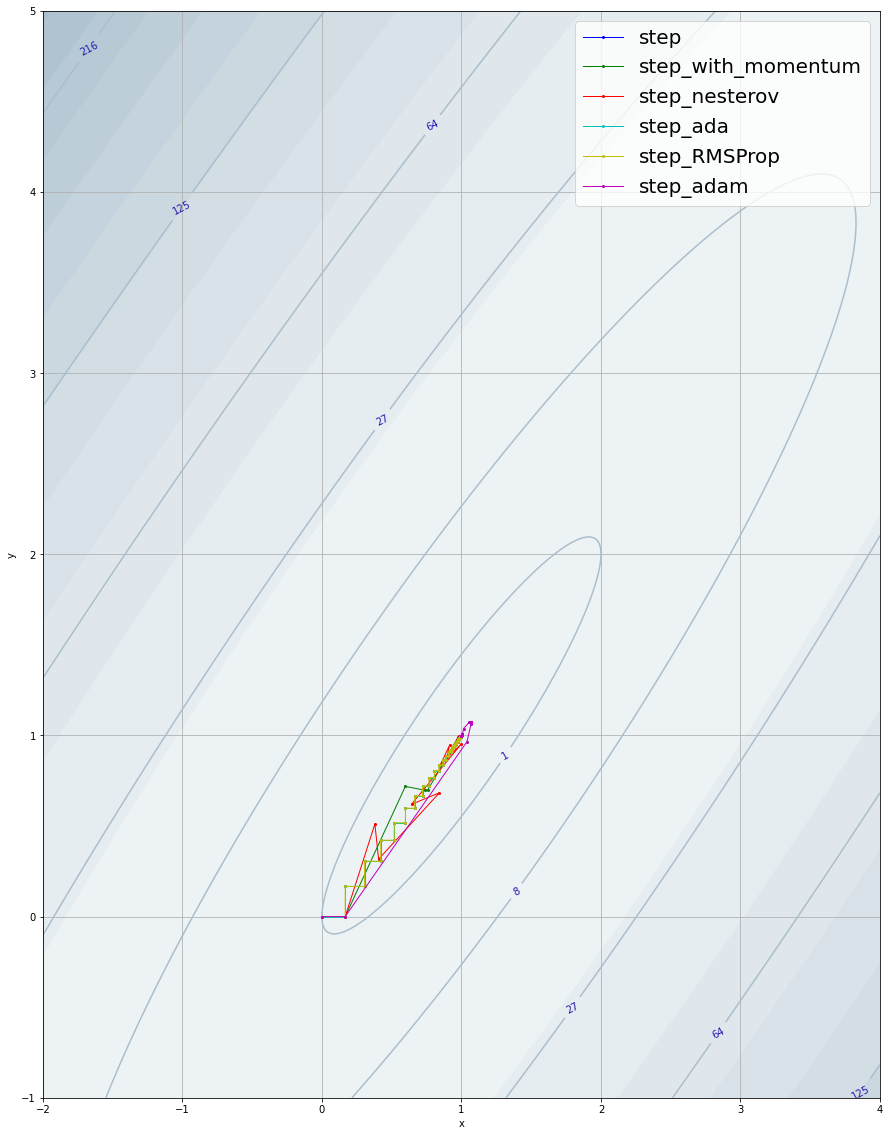

Библиотечные методы:
step                          	 Ответ : [0.99379419 0.99314266]. Количество операций : 71. Время : 1145 миллисекунд. Память : 59.774 KB
step_with_momentum            	 Ответ : [0.99402426 0.99339688]. Количество операций : 47. Время : 132 миллисекунд. Память : 10.442 KB
step_nesterov                 	 Ответ : [0.99377561 0.99311364]. Количество операций : 48. Время : 17 миллисекунд. Память : 10.338 KB
step_ada                      	 Ответ : [0.99355791 0.99291506]. Количество операций : 73. Время : 387 миллисекунд. Память : 16.818 KB
step_RMSProp                  	 Ответ : [0.99379419 0.99314266]. Количество операций : 71. Время : 35 миллисекунд. Память : 14.594 KB
step_adam                     	 Ответ : [1.00212419 1.00228199]. Количество операций : 68. Время : 57 миллисекунд. Память : 16.129 KB


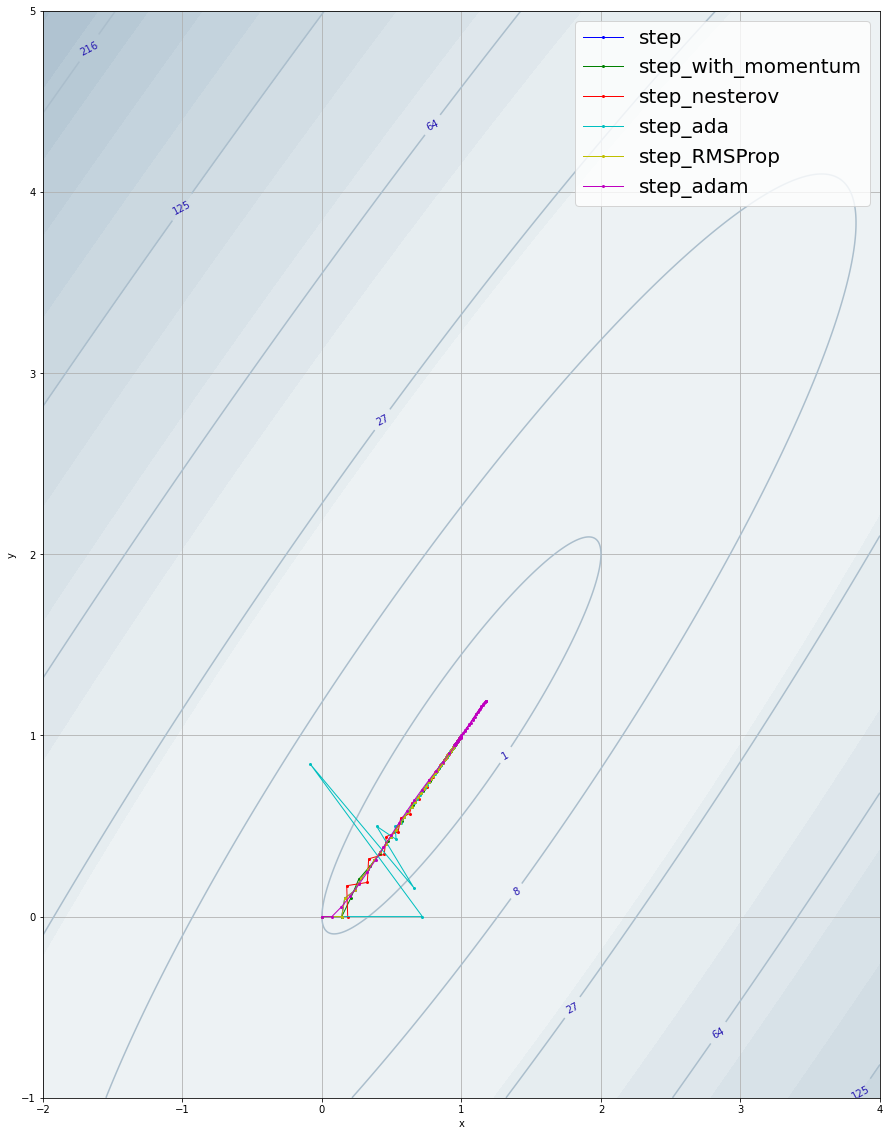

Стартовая точка: [-1.  0.]
Собственная реализация:
step                          	 Ответ : [0.99748167 0.99718787]. Количество операций : 67. Время : 6 миллисекунд. Память : 17.979 KB
step_with_momentum            	 Ответ : [0.99673269 0.99666532]. Количество операций : 73. Время : 9 миллисекунд. Память : 13.179 KB
step_nesterov                 	 Ответ : [0.99419306 0.99338615]. Количество операций : 92. Время : 45 миллисекунд. Память : 29.24 KB
step_ada                      	 Ответ : [0.99318911 0.99259011]. Количество операций : 125. Время : 43 миллисекунд. Память : 40.312 KB
step_RMSProp                  	 Ответ : [0.99512103 0.99507573]. Количество операций : 118. Время : 39 миллисекунд. Память : 40.763 KB
step_adam                     	 Ответ : [1.00122065 1.00188799]. Количество операций : 122. Время : 46 миллисекунд. Память : 49.56 KB


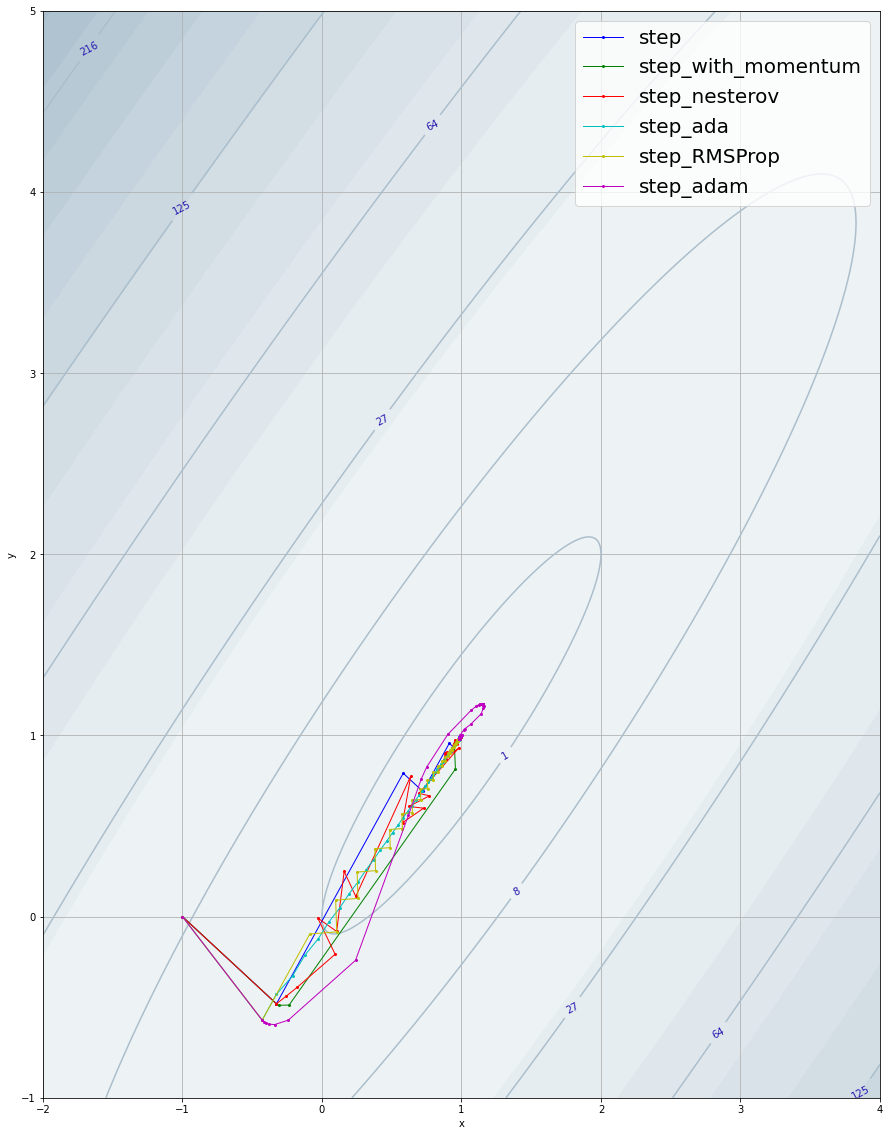

Библиотечные методы:
step                          	 Ответ : [0.99354422 0.99286644]. Количество операций : 76. Время : 27 миллисекунд. Память : 15.699 KB
step_with_momentum            	 Ответ : [0.99424904 0.99364526]. Количество операций : 51. Время : 19 миллисекунд. Память : 10.938 KB
step_nesterov                 	 Ответ : [0.99393459 0.99325293]. Количество операций : 52. Время : 19 миллисекунд. Память : 13.519 KB
step_ada                      	 Ответ : [0.99368772 0.99308803]. Количество операций : 90. Время : 32 миллисекунд. Память : 17.533 KB
step_RMSProp                  	 Ответ : [0.99354422 0.99286644]. Количество операций : 76. Время : 27 миллисекунд. Память : 15.422 KB
step_adam                     	 Ответ : [0.99403894 0.99323453]. Количество операций : 155. Время : 65 миллисекунд. Память : 29.235 KB


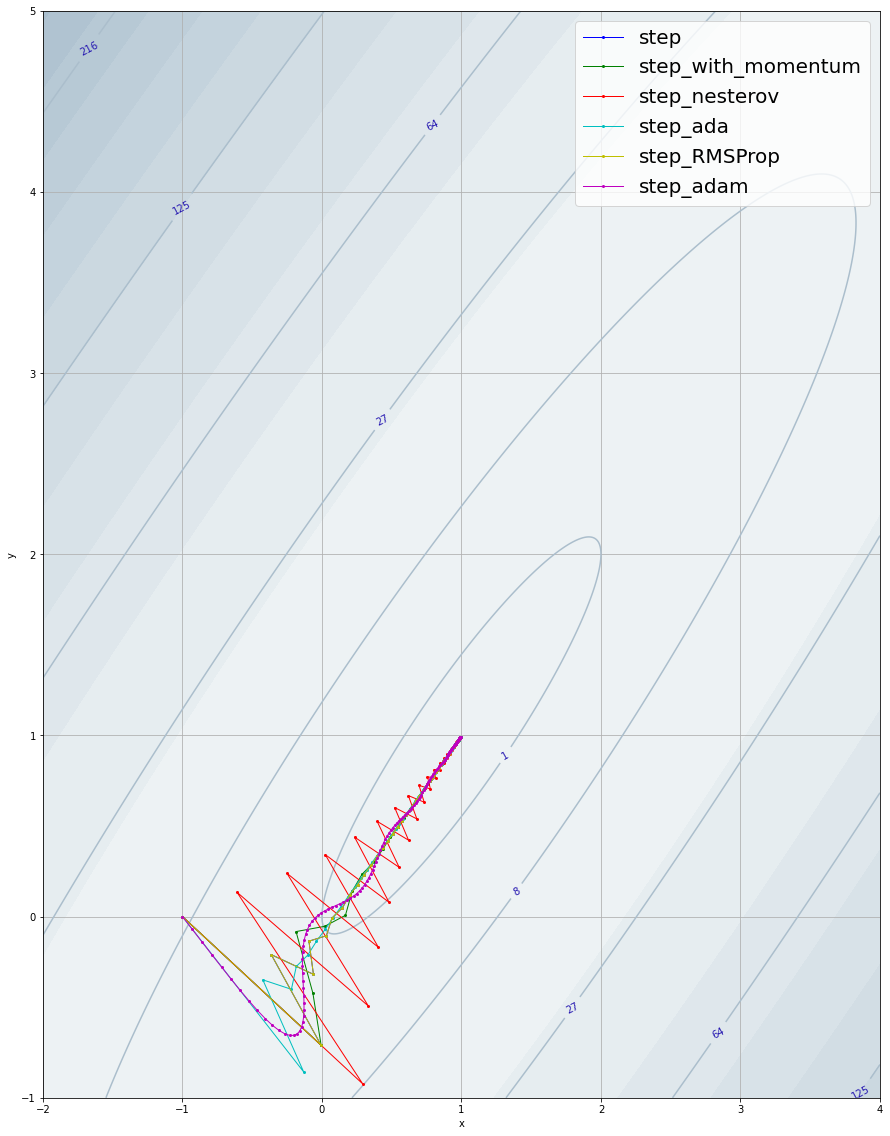

Стартовая точка: [2. 3.]
Собственная реализация:
step                          	 Ответ : [1.0058237  1.00634136]. Количество операций : 69. Время : 8 миллисекунд. Память : 13.531 KB
step_with_momentum            	 Ответ : [0.99554393 0.99547744]. Количество операций : 68. Время : 8 миллисекунд. Память : 8.787 KB
step_nesterov                 	 Ответ : [1.00389743 1.00412988]. Количество операций : 88. Время : 51 миллисекунд. Память : 25.816 KB
step_ada                      	 Ответ : [1.00553819 1.00572696]. Количество операций : 121. Время : 42 миллисекунд. Память : 29.728 KB
step_RMSProp                  	 Ответ : [1.00569214 1.00606814]. Количество операций : 105. Время : 33 миллисекунд. Память : 35.683 KB
step_adam                     	 Ответ : [1.00062664 1.00085169]. Количество операций : 120. Время : 42 миллисекунд. Память : 35.864 KB


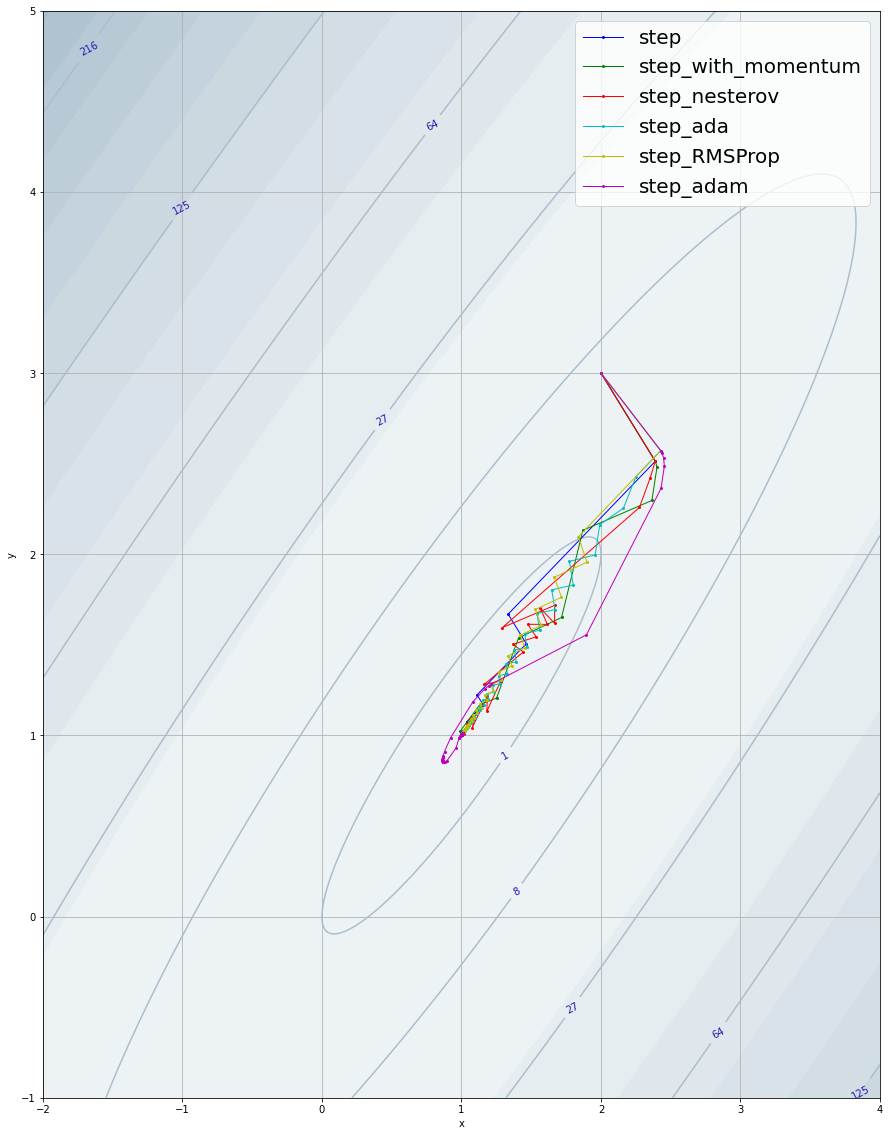

Библиотечные методы:
step                          	 Ответ : [1.00622384 1.00687727]. Количество операций : 77. Время : 27 миллисекунд. Память : 15.867 KB
step_with_momentum            	 Ответ : [1.00594541 1.00656961]. Количество операций : 51. Время : 20 миллисекунд. Память : 10.048 KB
step_nesterov                 	 Ответ : [1.00631008 1.00693937]. Количество операций : 52. Время : 20 миллисекунд. Память : 12.394 KB
step_ada                      	 Ответ : [1.00646357 1.00712846]. Количество операций : 88. Время : 54 миллисекунд. Память : 16.974 KB
step_RMSProp                  	 Ответ : [1.00622384 1.00687727]. Количество операций : 77. Время : 69 миллисекунд. Память : 15.474 KB
step_adam                     	 Ответ : [1.00103797 1.00103008]. Количество операций : 117. Время : 65 миллисекунд. Память : 22.791 KB


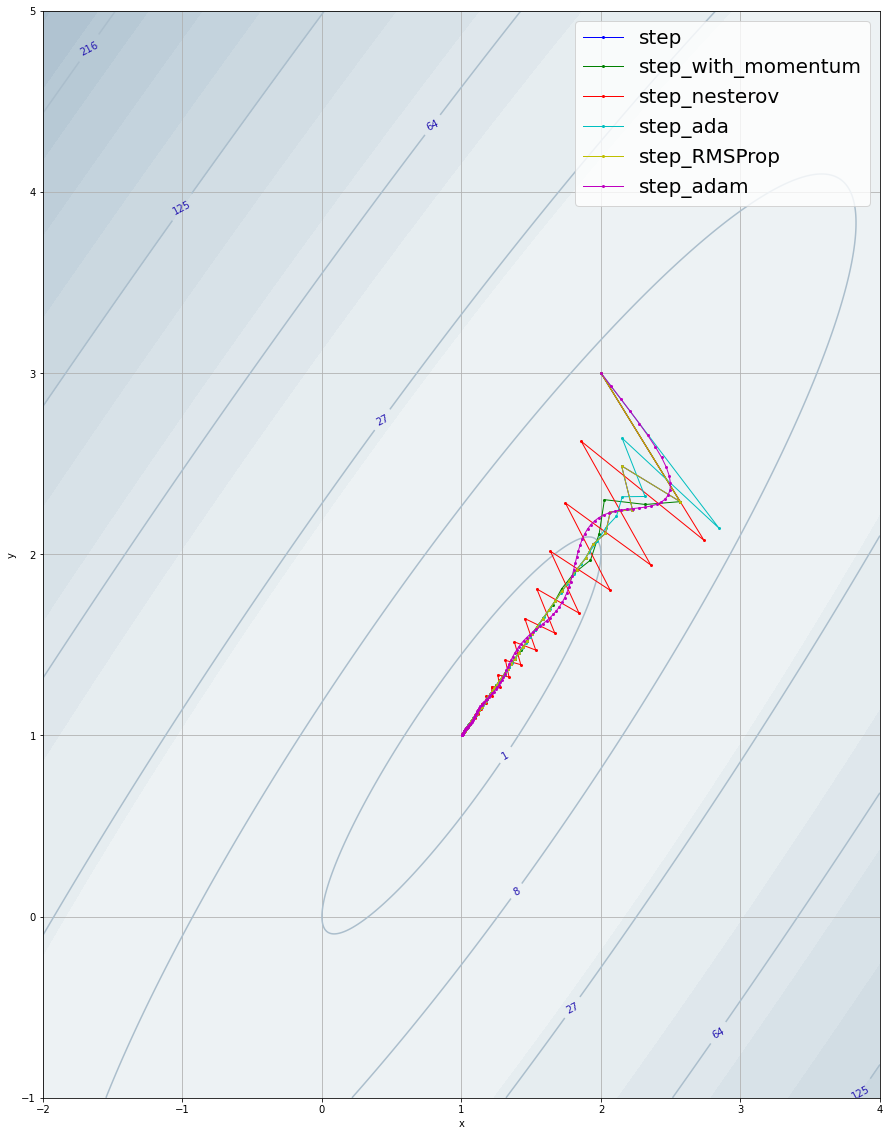

Стартовая точка: [4. 7.]
Собственная реализация:
step                          	 Ответ : [1.00584446 1.00636396]. Количество операций : 71. Время : 14 миллисекунд. Память : 13.883 KB
step_with_momentum            	 Ответ : [0.99805315 0.99734934]. Количество операций : 80. Время : 25 миллисекунд. Память : 17.835 KB
step_nesterov                 	 Ответ : [1.00326791 1.00376113]. Количество операций : 92. Время : 51 миллисекунд. Память : 28.923 KB
step_ada                      	 Ответ : [1.00679115 1.00761501]. Количество операций : 275. Время : 159 миллисекунд. Память : 90.187 KB
step_RMSProp                  	 Ответ : [1.0052769  1.00551658]. Количество операций : 131. Время : 53 миллисекунд. Память : 56.863 KB
step_adam                     	 Ответ : [0.99873047 0.99904847]. Количество операций : 139. Время : 54 миллисекунд. Память : 47.712 KB


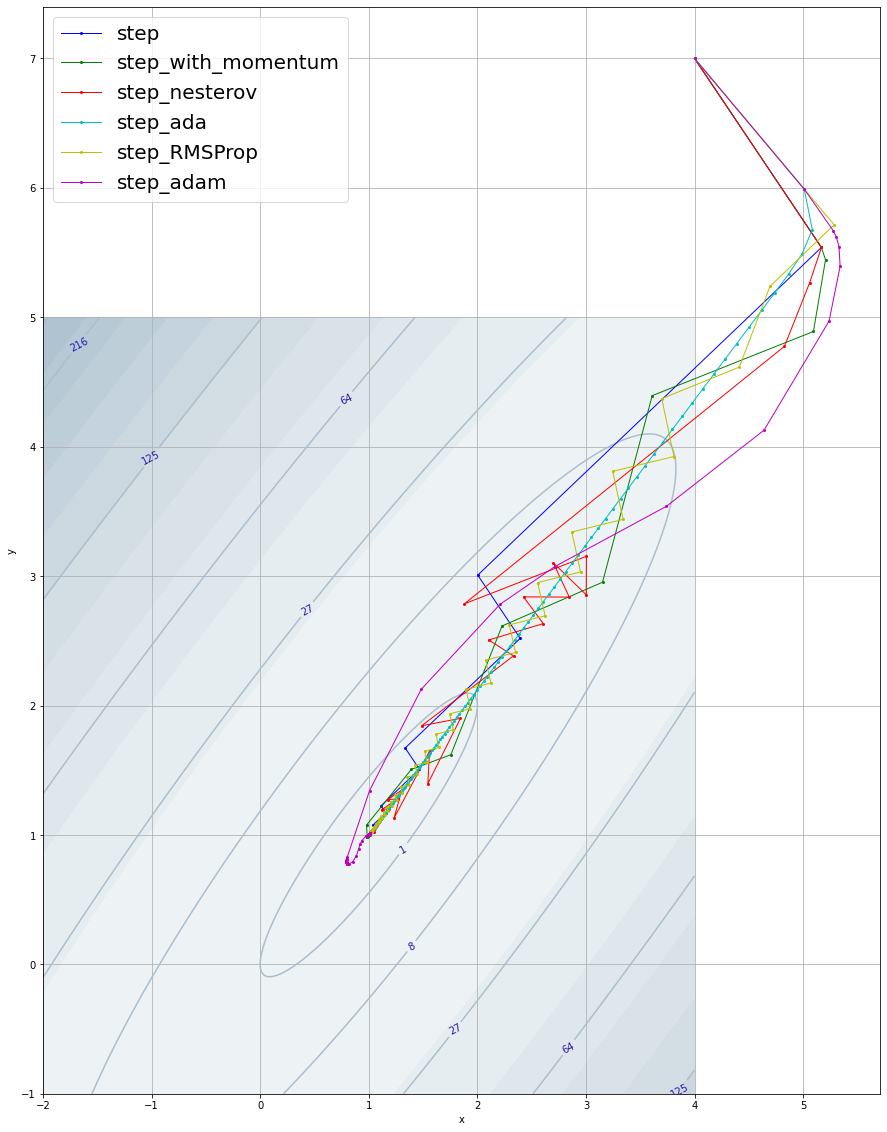

Библиотечные методы:
step                          	 Ответ : [1.00654938 1.00723698]. Количество операций : 92. Время : 35 миллисекунд. Память : 18.515 KB
step_with_momentum            	 Ответ : [1.00613265 1.0067765 ]. Количество операций : 61. Время : 22 миллисекунд. Память : 12.506 KB
step_nesterov                 	 Ответ : [1.00608206 1.0067323 ]. Количество операций : 63. Время : 23 миллисекунд. Память : 12.906 KB
step_ada                      	 Ответ : [1.00662733 1.00744098]. Количество операций : 259. Время : 126 миллисекунд. Память : 47.166 KB
step_RMSProp                  	 Ответ : [1.00654938 1.00723698]. Количество операций : 92. Время : 40 миллисекунд. Память : 18.772 KB
step_adam                     	 Ответ : [1.00673353 1.00754037]. Количество операций : 439. Время : 197 миллисекунд. Память : 79.567 KB


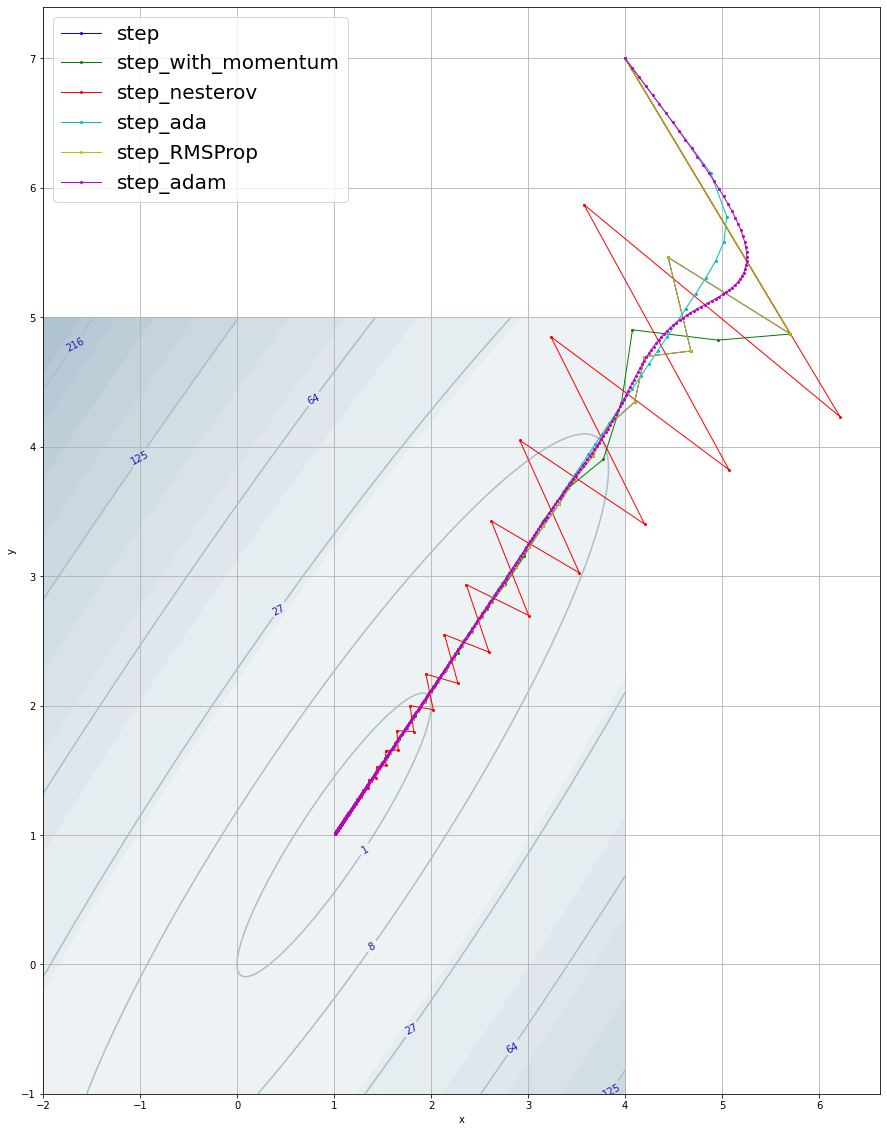

Стартовая точка: [3. 5.]
Собственная реализация:
step                          	 Ответ : [1.00389631 1.00424264]. Количество операций : 71. Время : 16 миллисекунд. Память : 13.883 KB
step_with_momentum            	 Ответ : [0.99465896 0.99442484]. Количество операций : 76. Время : 23 миллисекунд. Память : 14.547 KB
step_nesterov                 	 Ответ : [1.00492783 1.00567353]. Количество операций : 90. Время : 73 миллисекунд. Память : 28.0 KB
step_ada                      	 Ответ : [1.00690578 1.00771661]. Количество операций : 183. Время : 188 миллисекунд. Память : 81.963 KB
step_RMSProp                  	 Ответ : [1.00560598 1.00656596]. Количество операций : 114. Время : 45 миллисекунд. Память : 44.283 KB
step_adam                     	 Ответ : [0.99526429 0.99527757]. Количество операций : 127. Время : 108 миллисекунд. Память : 53.439 KB


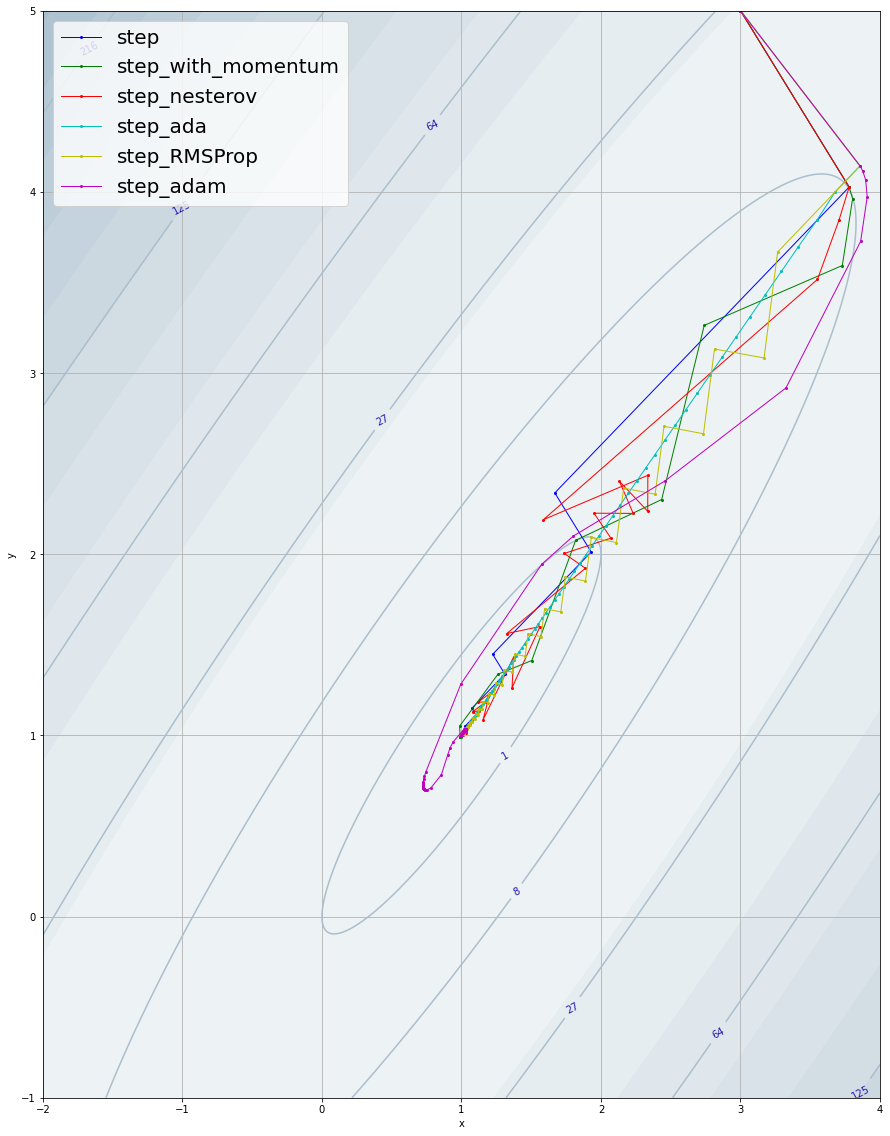

Библиотечные методы:
step                          	 Ответ : [1.00619111 1.0068411 ]. Количество операций : 87. Время : 51 миллисекунд. Память : 17.547 KB
step_with_momentum            	 Ответ : [1.00626641 1.00692431]. Количество операций : 57. Время : 34 миллисекунд. Память : 10.906 KB
step_nesterov                 	 Ответ : [1.00611676 1.00677593]. Количество операций : 59. Время : 34 миллисекунд. Память : 11.274 KB
step_ada                      	 Ответ : [1.00665334 1.00743065]. Количество операций : 146. Время : 55 миллисекунд. Память : 27.166 KB
step_RMSProp                  	 Ответ : [1.00619111 1.0068411 ]. Количество операций : 87. Время : 51 миллисекунд. Память : 17.318 KB
step_adam                     	 Ответ : [1.00651318 1.00726094]. Количество операций : 275. Время : 160 миллисекунд. Память : 51.717 KB


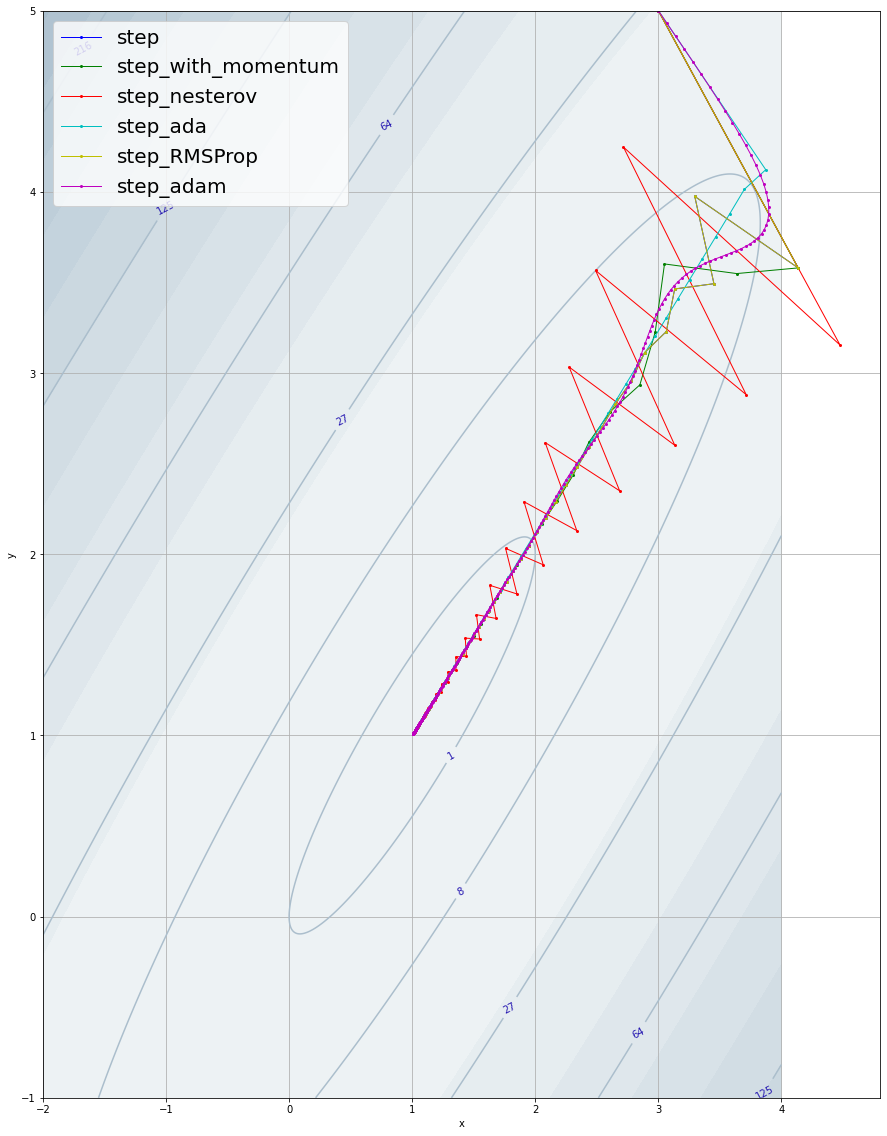

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import datetime
import tracemalloc
from numpy import linalg as LA
from math import sqrt
from matplotlib.colors import ListedColormap

plt.rcParams["figure.figsize"] = (20, 10)

phi = (sqrt(5) - 1) / 2

eps=1e-6

def golden_search(f):
    def step(old_interval, f_x1=None, f_x2=None, cnt = 0, it = 0):

        a, b = old_interval

        if b - a < eps:
            mid = (a + b) / 2
            return mid, it + 1

        t = (b - a) * phi
        x1, x2 = b - t, a + t

        f_x1 = f_x1 if f_x1 else f(x1)
        f_x2 = f_x2 if f_x2 else f(x2)

        if f_x1 < f_x2:
            new_interval = (a, x2)
            args = [None, f_x1]
        else:
            new_interval = (x1, b)
            args = [f_x2, None]

        it += 1

        return step(new_interval, *args, cnt + 1, it + 1)

    return step

def library_methods(f, start, optimizer, iteration=20_000, eps=1e-5):
    x0 = np.array(start)
    x0_torch = torch.tensor(x0, requires_grad=True)
    opt = optimizer(x0_torch)
    f_torch = f(x0_torch[0],x0_torch[1])
    trace = []
    for i in range(iteration):
        f_torch = f(x0_torch[0], x0_torch[1])
        trace.append(x0_torch.detach().numpy().copy())
        opt.zero_grad()
        f_torch.backward()
        opt.step()
        if LA.norm(x0_torch.grad.numpy()) < eps:
            return i, np.asarray(trace), x0_torch.detach().numpy()

    return iteration, np.asarray(trace), None

def common_gd(f, derivative, x0, method, step_method, iteration=20_000, eps=1e-5):
    xk = x0
    p_i = np.zeros(len(x0))
    v_i = np.zeros(len(x0))
    trace = [xk]
    for i in range(iteration):
        x_next, p_i, v_i, it = step_method(f, derivative, method, xk, p_i, v_i)
        trace.append(x_next)

        if LA.norm(derivative(*x_next)) < eps:
            return i + it, np.asarray(trace), x_next

        xk = x_next
    return iteration + it, np.asarray(trace), None

def plot_graph(f, trace):
    fig, ax = plt.subplots()

    x, y = np.mgrid[-2:2:1000j, -1:4:1000j]
    z = f(x, y)

    levels = [x ** 3 for x in range(8)]
    r = np.linspace(240, 166, 256) / 255.
    g = np.linspace(244, 188, 256) / 255.
    b = np.linspace(246, 203, 256) / 255.
    cmap = ListedColormap(np.vstack((r, g, b)).T)

    ax.contourf(x, y, z, levels=10, cmap=cmap)
    cs = ax.contour(x, y, z, levels=levels, colors="#ABBECC")
    ax.clabel(cs, colors="#2618B1")

    ax.plot(trace[:, 0], trace[:, 1], '-og', linewidth=.5, ms=1.5)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid()

    fig.set_figwidth(10)
    fig.set_figheight(12)

    plt.show()


def plot_all_graph(f, trace, step_representation):
    fig, ax = plt.subplots()

    x, y = np.mgrid[-2:4:1000j, -1:5:1000j]
    z = f(x, y)

    levels = [x ** 3 for x in range(8)]
    r = np.linspace(240, 166, 256) / 255.
    g = np.linspace(244, 188, 256) / 255.
    b = np.linspace(246, 203, 256) / 255.
    cmap = ListedColormap(np.vstack((r, g, b)).T)

    ax.contourf(x, y, z, levels=10, cmap=cmap)
    cs = ax.contour(x, y, z, levels=levels, colors="#ABBECC")
    ax.clabel(cs, colors="#2618B1")
    color = ["b", "g", "r", "c", "y", "m"]
    for i in range(len(trace)):
        ax.plot(trace[i][:, 0], trace[i][:, 1], '-o' + color[i], linewidth=1., ms=2, label=step_representation[i])
    # ax.legend(['1', "2"])
    #   b g r c m y
    ax.legend(prop={'size': 20})
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid()

    fig.set_figwidth(15)
    fig.set_figheight(20)

    plt.show()

def step(f, derivative, method, x, _, __):
   pk = -derivative(*x)
   g = lambda a: f(*(x + a * pk))
   ak, it = method(g)((0, 1.01))
   x_next = x + ak * pk
   return x_next, _, __, it

def step_with_momentum(f, derivative, method, x, p_prev, _):
    beta = 0.5
    pk = beta * p_prev + (1 - beta) * derivative(*x)
    g = lambda a: f(*(x - a * pk))
    ak, it = method(g)((0, 1.01))
    return x - ak * pk, pk, _, it

def step_nesterov(f, derivative, method, x, p_prev, _):
    beta = 0.3
    g = lambda a: f(*(x - beta * p_prev - a * derivative(*(x - beta * p_prev))))
    ak, it = method(g)((0, 1.01))
    return x - beta * p_prev - ak * derivative(*(x - beta * p_prev)), beta * p_prev - ak * derivative(*(x - beta * p_prev)), _, it

def step_ada(f, derivative, method, x, p_prev, _):
    d = derivative(*x)
    pk = p_prev + np.square(d)
    pt =  d / (np.sqrt(pk) + 1e-8)
    g = lambda a: f(*(x - a * pt))
    ak, it = method(g)((0, 1.01))
    return x - ak * pt, pk, _, it

def step_RMSProp(f, derivative, method, x, p_prev, _):
    gamma = 0.9
    d = derivative(*x)
    pk = gamma * p_prev + (1 - gamma) * np.square(d)
    pt = d / (np.sqrt(pk) + 1e-8)
    g = lambda a: f(*(x - a * pt))
    ak, it = method(g)((0, 1.01))
    return x - ak * pt, pk, _, it

def step_adam(f, derivative, method, x, p_prev, v_prev):
    beta1 = 0.9
    beta2 = 0.99
    d = derivative(*x)
    pk = beta1 * p_prev + (1 - beta1) * d
    vk = beta2 * v_prev + (1 - beta2) * np.square(d)
    pt = pk / (np.sqrt(vk) + 1e-8)
    g = lambda a: f(*(x - a * pt))
    ak, it = method(g)((0, 1.01))
    return x - ak * pt, pk, vk, it


representations = ["5 * (y - x) ^ 2 + (1 - x) ^ 2"]

fs = [lambda x, y: 5 * (y - x) ** 2 + (1 - x) ** 2]

derivatives = [lambda x, y: np.array([-10 * (y - x) + 2 * x - 2, 10 * (y - x)])]

starts = np.array([[0., 0.], [-1., 0.], [2., 3.], [4., 7.], [3., 5.]])

steps = [step, step_with_momentum, step_nesterov, step_ada, step_RMSProp, step_adam]
step_representation = ["step", "step_with_momentum", "step_nesterov", "step_ada", "step_RMSProp", "step_adam"]

class Parameters:
    beta1 = 0.9
    beta2 = 0.999
    eps = 1e-8
    lr = 0.071
    iterations = 100

optimizers = [lambda x : torch.optim.SGD([x], lr = Parameters.lr),
              lambda x : torch.optim.SGD([x], lr = Parameters.lr, momentum=0.3),
              lambda x : torch.optim.SGD([x], lr = Parameters.lr, momentum=0.3, nesterov=True),
              lambda x : torch.optim.Adagrad([x],  lr = 0.9, eps=0.5),
              lambda x : torch.optim.SGD([x], lr = Parameters.lr),
              lambda x : torch.optim.Adam([x], lr = Parameters.lr, betas=(Parameters.beta1, Parameters.beta2), eps=Parameters.eps)]

e = 1e-2

for i, f in enumerate(fs):
    print(f'f = {representations[i]}:')
    for s in starts:
        print("Стартовая точка:", s)
        tr = []
        print("Собственная реализация:")
        for q in range(len(steps)):
            tracemalloc.start()
            start = datetime.datetime.now()
            oper, trace, x = common_gd(f, derivatives[i], s, golden_search, steps[q], eps=e)
            end = datetime.datetime.now()
            _, memory = tracemalloc.get_traced_memory()
            tracemalloc.stop()
            time = (end - start) / 1000
            memory /= 1000
            if x is None:
                ans = "..."
                print(trace[-1])
            else:
                ans = x
            tr.append(trace)
            print(f'{step_representation[q].ljust(30, " ")}\t Ответ : {ans}. Количество операций : {oper}. Время : {time.microseconds} миллисекунд. Память : {memory} KB')
        plot_all_graph(f, tr, step_representation)

        tr = []
        print("Библиотечные методы:")
        for q in range(len(optimizers)):
            tracemalloc.start()
            start = datetime.datetime.now()
            oper, trace, x = library_methods(f, s, optimizers[q], eps=e)
            end = datetime.datetime.now()
            _, memory = tracemalloc.get_traced_memory()
            tracemalloc.stop()
            time = (end - start) / 1000
            memory /= 1000
            if x is None:
                ans = "..."
                print(trace[-1])
            else:
                ans = x
            tr.append(trace)
            print(f'{step_representation[q].ljust(30, " ")}\t Ответ : {ans}. Количество операций : {oper}. Время : {time.microseconds} миллисекунд. Память : {memory} KB')
        plot_all_graph(f, tr, step_representation)

f = 5 * (y - x) ^ 2 + (1 - x) ^ 2:
Стартовая точка: [0. 0.]
bfgs                          	 Ответ : [1. 1.]. Количество операций : 4. Время : 26 миллисекунд. Память : 7.024 KB
bfgs-lib                      	 Ответ : [1. 1.]. Количество операций : 4. Время : 34 миллисекунд. Память : 19.965 KB
gauss-newton 0.9999999999999999 0.9999999999389613 3
trust-ncg                     	 Ответ : [1. 1.]. Количество операций : 2. Время : 17 миллисекунд. Память : 16.832 KB
dogleg                        	 Ответ : [1. 1.]. Количество операций : 1. Время : 1 миллисекунд. Память : 2.648 KB
dogleg-lib                    	 Ответ : [1. 1.]. Количество операций : 2. Время : 57 миллисекунд. Память : 9.504 KB


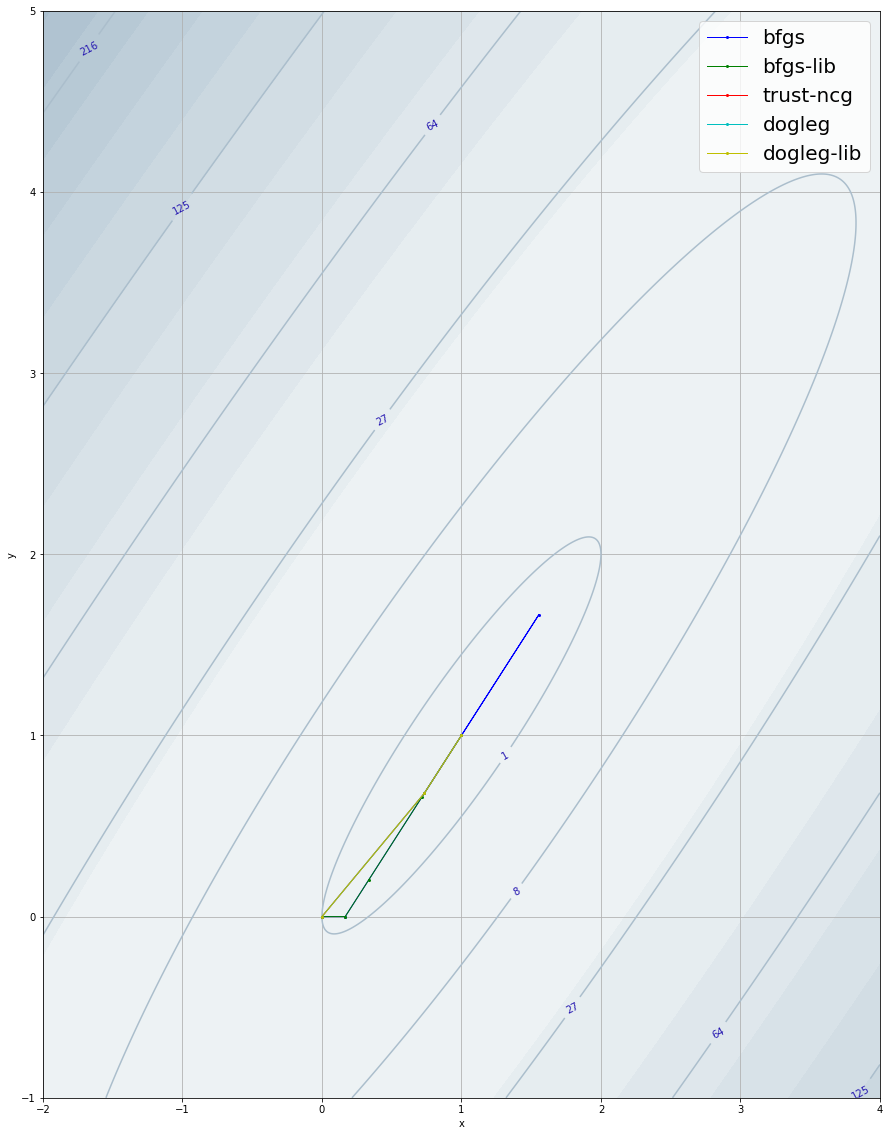

Стартовая точка: [-1.2  0. ]
bfgs                          	 Ответ : [1. 1.]. Количество операций : 5. Время : 4 миллисекунд. Память : 5.656 KB
bfgs-lib                      	 Ответ : [1. 1.]. Количество операций : 4. Время : 3 миллисекунд. Память : 8.096 KB
gauss-newton 0.9999999999999996 1.0000000000000002 3
trust-ncg                     	 Ответ : [1. 1.]. Количество операций : 3. Время : 2 миллисекунд. Память : 5.669 KB
dogleg                        	 Ответ : [1. 1.]. Количество операций : 1. Время : 1 миллисекунд. Память : 1.464 KB
dogleg-lib                    	 Ответ : [1. 1.]. Количество операций : 2. Время : 2 миллисекунд. Память : 5.186 KB


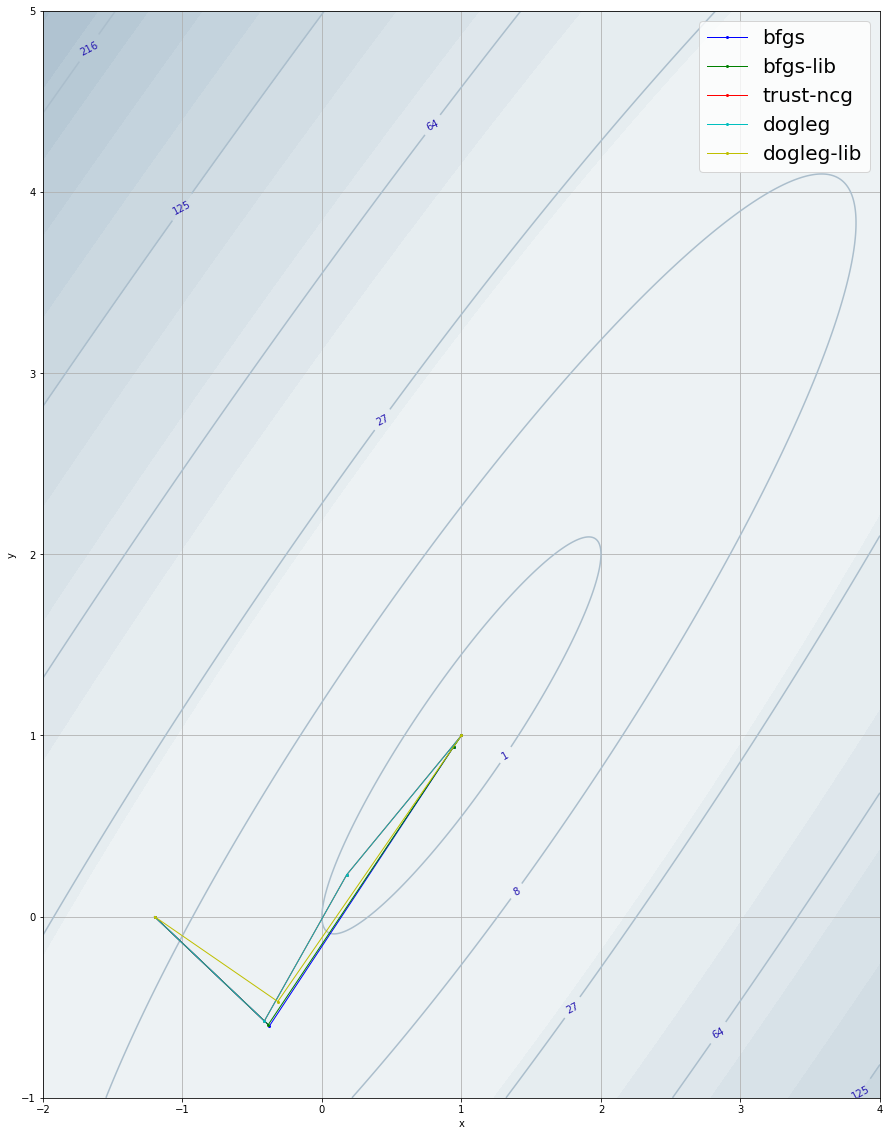

Стартовая точка: [2.5 3. ]
bfgs                          	 Ответ : [1. 1.]. Количество операций : 4. Время : 1 миллисекунд. Память : 5.656 KB
bfgs-lib                      	 Ответ : [1. 1.]. Количество операций : 3. Время : 2 миллисекунд. Память : 8.041 KB
gauss-newton 1.0000000000000009 1.0000000002328342 2
trust-ncg                     	 Ответ : [1. 1.]. Количество операций : 4. Время : 5 миллисекунд. Память : 5.917 KB
dogleg                        	 Ответ : [1. 1.]. Количество операций : 1. Время : 1 миллисекунд. Память : 1.464 KB
dogleg-lib                    	 Ответ : [1. 1.]. Количество операций : 2. Время : 1 миллисекунд. Память : 5.272 KB


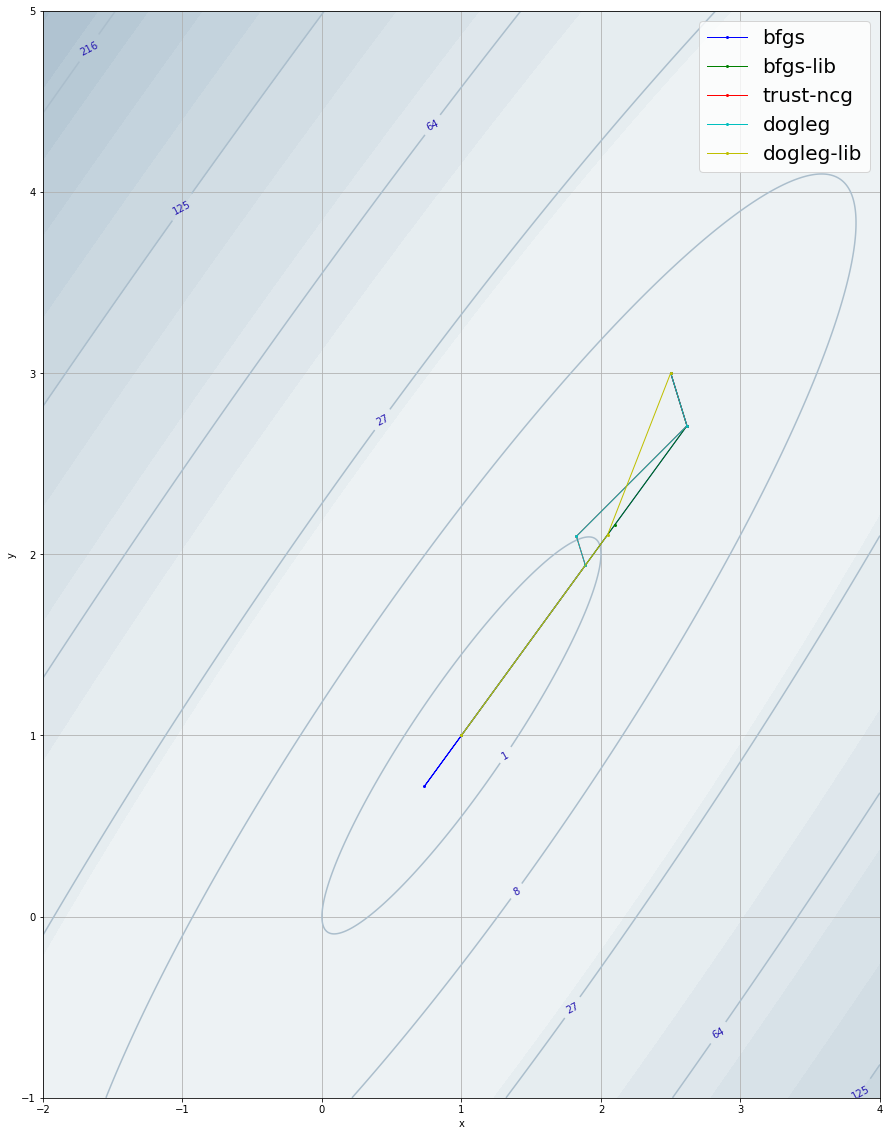

Стартовая точка: [4. 7.]
bfgs                          	 Ответ : [1. 1.]. Количество операций : 4. Время : 2 миллисекунд. Память : 5.656 KB
bfgs-lib                      	 Ответ : [1. 1.]. Количество операций : 5. Время : 2 миллисекунд. Память : 8.041 KB
gauss-newton 1.0 1.0 3
trust-ncg                     	 Ответ : [1. 1.]. Количество операций : 5. Время : 2 миллисекунд. Память : 5.438 KB
dogleg                        	 Ответ : [1. 1.]. Количество операций : 3. Время : 4 миллисекунд. Память : 2.399 KB
dogleg-lib                    	 Ответ : [1. 1.]. Количество операций : 4. Время : 1 миллисекунд. Память : 4.987 KB


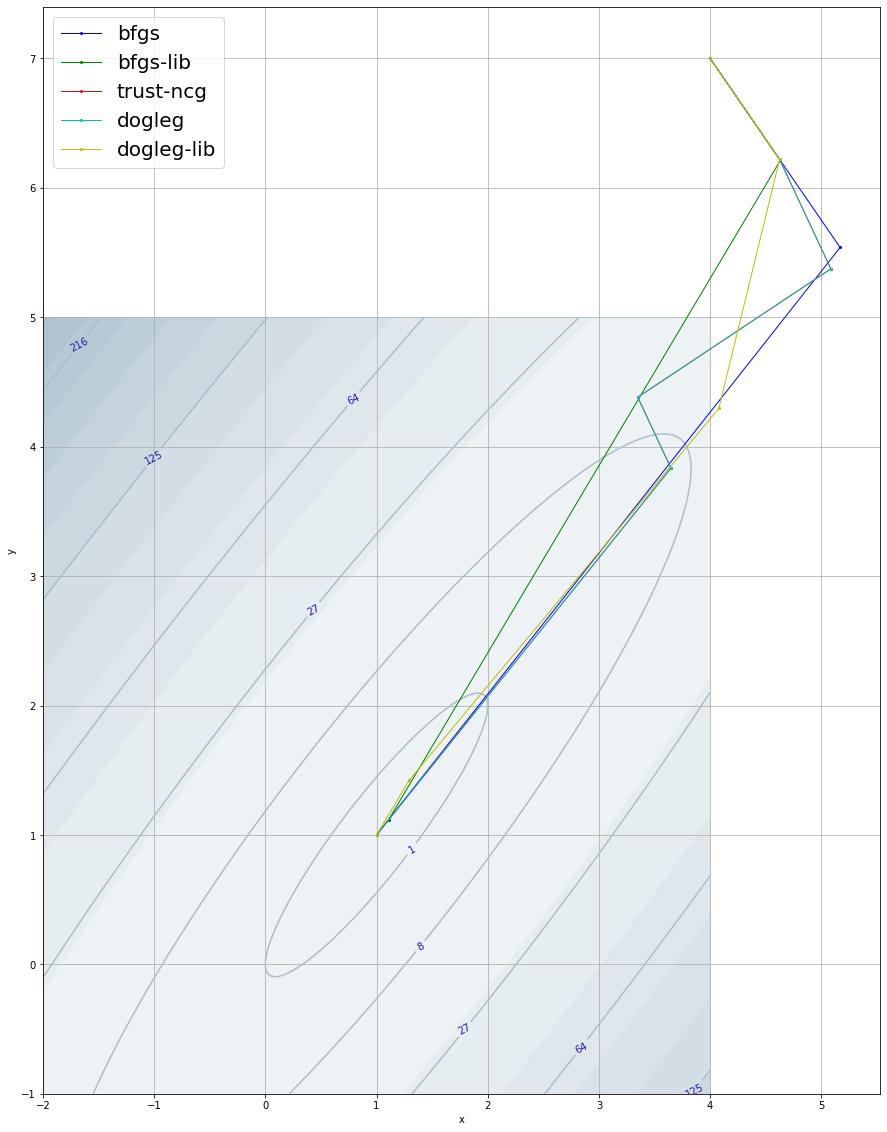

Стартовая точка: [3. 5.]
bfgs                          	 Ответ : [1. 1.]. Количество операций : 4. Время : 2 миллисекунд. Память : 5.656 KB
bfgs-lib                      	 Ответ : [1. 1.]. Количество операций : 4. Время : 4 миллисекунд. Память : 8.041 KB
gauss-newton 0.9999999999999996 1.000000000931335 2
trust-ncg                     	 Ответ : [1. 1.]. Количество операций : 3. Время : 3 миллисекунд. Память : 5.797 KB
dogleg                        	 Ответ : [1. 1.]. Количество операций : 3. Время : 2 миллисекунд. Память : 2.335 KB
dogleg-lib                    	 Ответ : [1. 1.]. Количество операций : 3. Время : 1 миллисекунд. Память : 5.338 KB


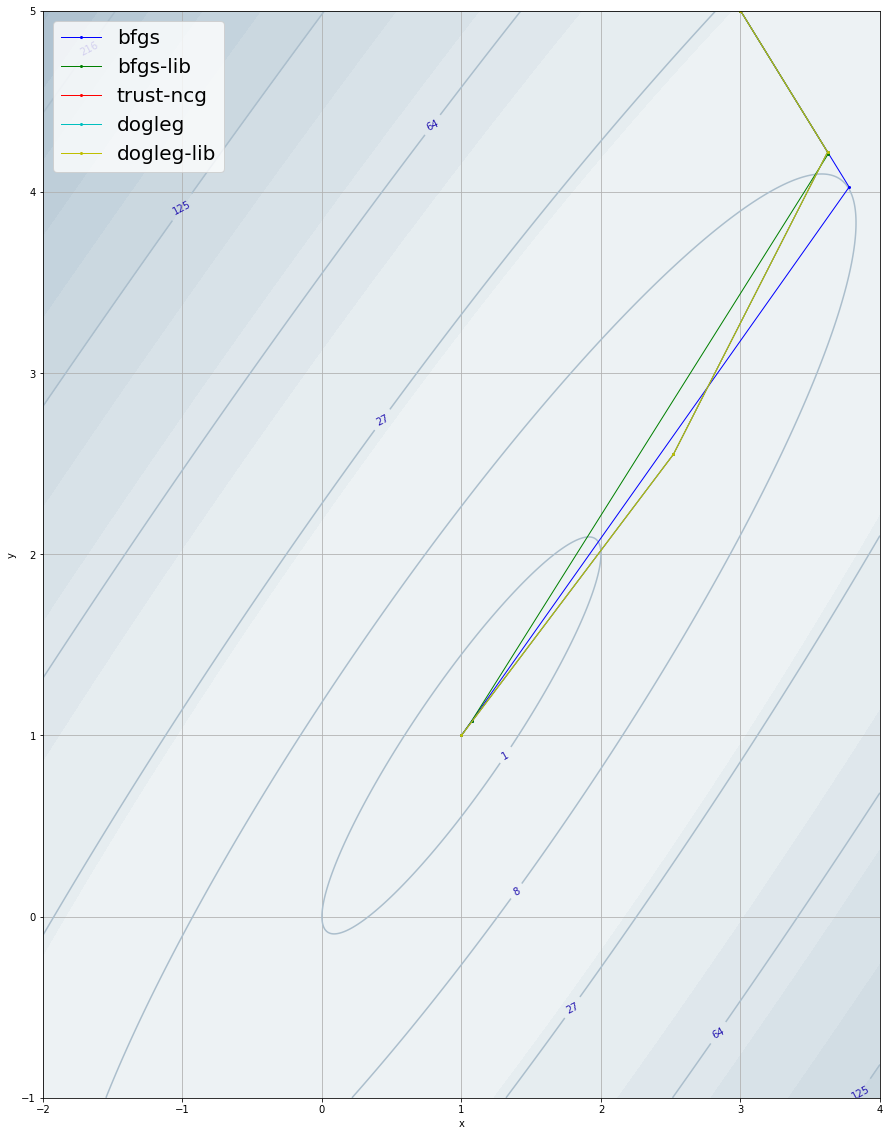

f = (100 * (y - x ^ 2) ^ 2 + (1 - x) ^ 2):
Стартовая точка: [0. 0.]
bfgs                          	 Ответ : [0.99999999 0.99999998]. Количество операций : 20. Время : 11 миллисекунд. Память : 5.656 KB
bfgs-lib                      	 Ответ : [0.99999999 0.99999998]. Количество операций : 20. Время : 8 миллисекунд. Память : 8.041 KB
gauss-newton 1.0 1.0 12
trust-ncg                     	 Ответ : [0.99999999 0.99999998]. Количество операций : 21. Время : 11 миллисекунд. Память : 8.093 KB
dogleg                        	 Ответ : [1. 1.]. Количество операций : 17. Время : 4 миллисекунд. Память : 4.015 KB
dogleg-lib                    	 Ответ : [1. 1.]. Количество операций : 4. Время : 1 миллисекунд. Память : 5.545 KB


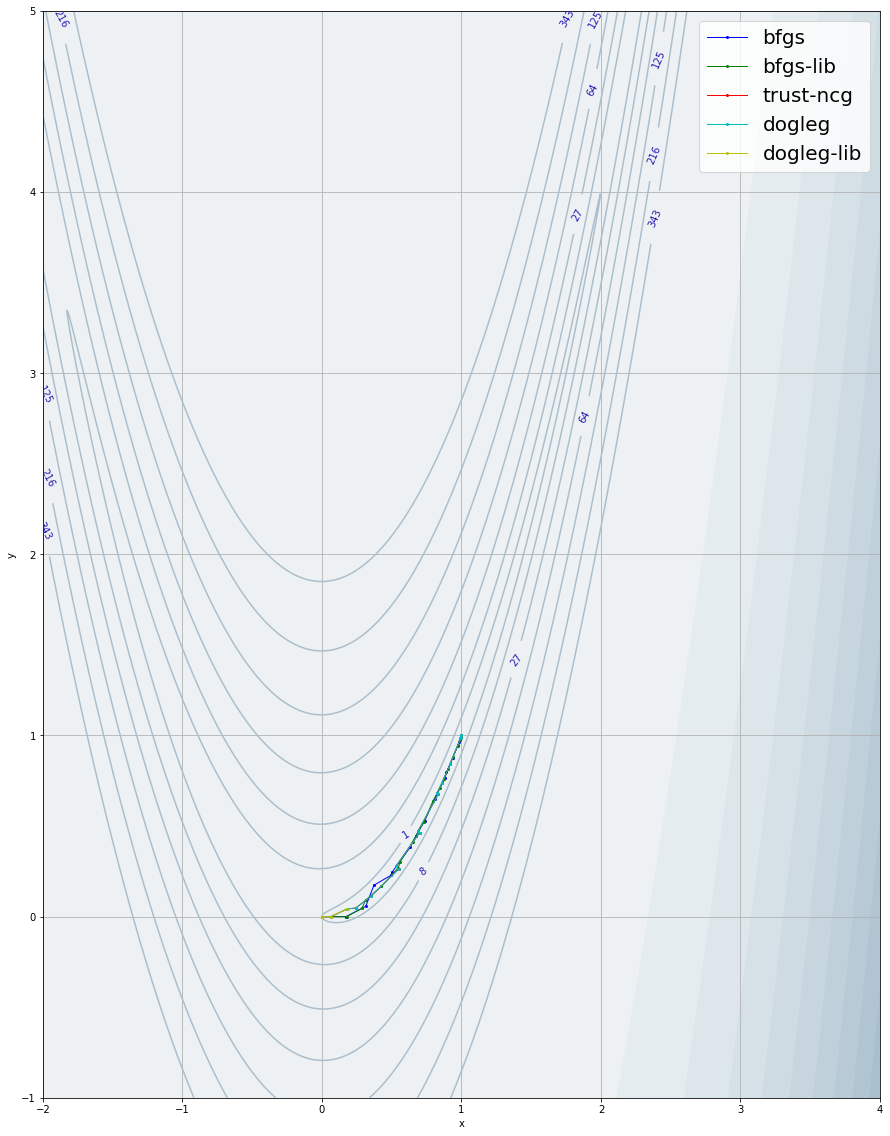

Стартовая точка: [-1.2  0. ]
bfgs                          	 Ответ : [1. 1.]. Количество операций : 20. Время : 8 миллисекунд. Память : 5.656 KB
bfgs-lib                      	 Ответ : [1. 1.]. Количество операций : 27. Время : 13 миллисекунд. Память : 9.876 KB
gauss-newton 1.0 1.0 16
trust-ncg                     	 Ответ : [1. 1.]. Количество операций : 51. Время : 26 миллисекунд. Память : 11.741 KB
dogleg                        	 Ответ : [1. 1.]. Количество операций : 24. Время : 8 миллисекунд. Память : 4.855 KB
dogleg-lib                    	 Ответ : [1. 1.]. Количество операций : 22. Время : 9 миллисекунд. Память : 7.226 KB


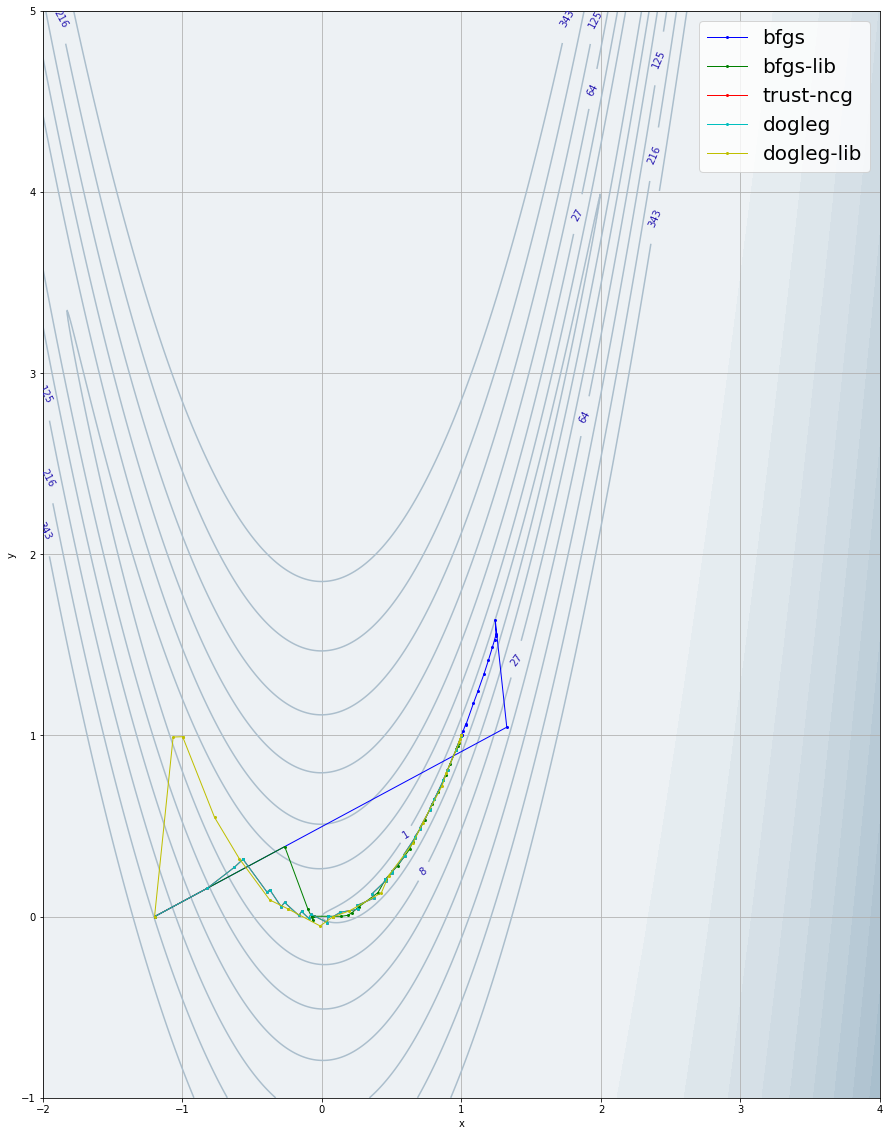

Стартовая точка: [2.5 3. ]
bfgs                          	 Ответ : [1. 1.]. Количество операций : 45. Время : 20 миллисекунд. Память : 9.277 KB
bfgs-lib                      	 Ответ : [1. 1.]. Количество операций : 15. Время : 6 миллисекунд. Память : 7.985 KB
gauss-newton 1.0 1.0 4
trust-ncg                     	 Ответ : [1. 1.]. Количество операций : 22. Время : 10 миллисекунд. Память : 8.541 KB
dogleg                        	 Ответ : [1. 1.]. Количество операций : 19. Время : 9 миллисекунд. Память : 5.271 KB
dogleg-lib                    	 Ответ : [1. 1.]. Количество операций : 19. Время : 8 миллисекунд. Память : 7.466 KB


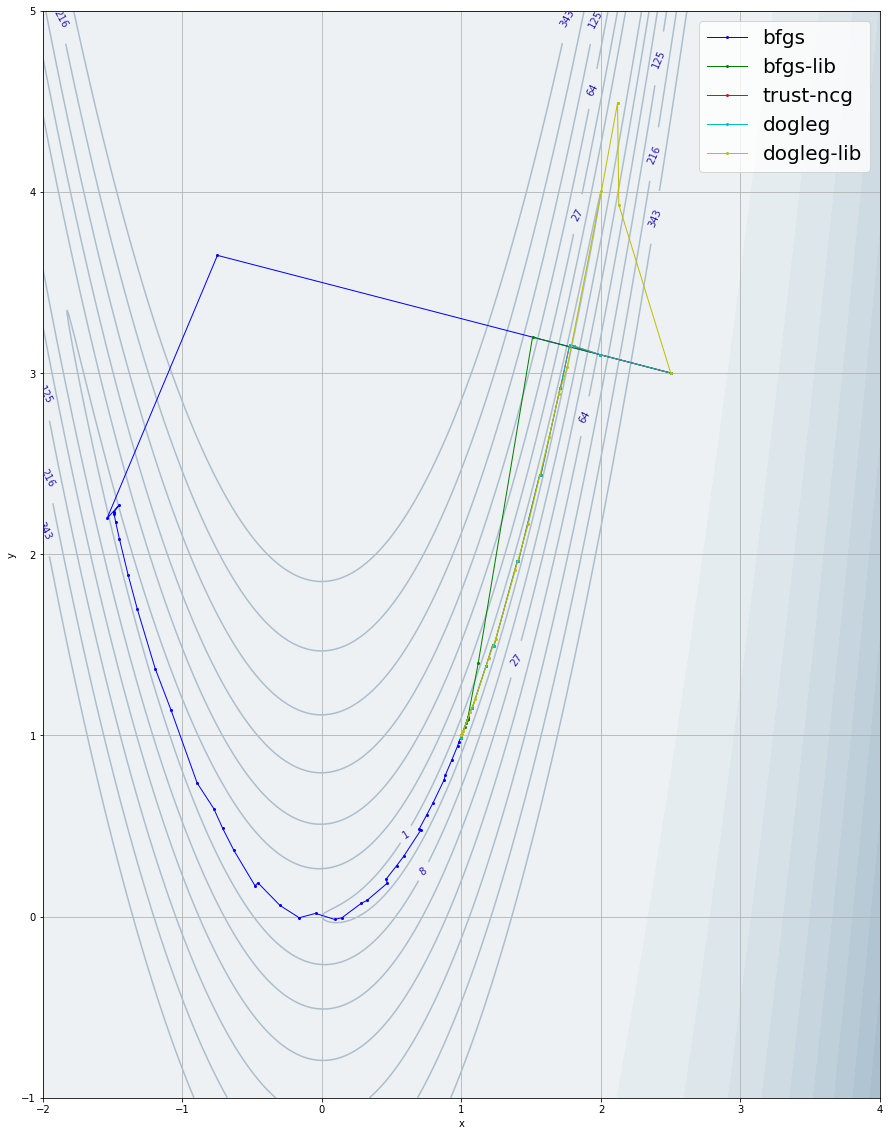

Стартовая точка: [4. 7.]
bfgs                          	 Ответ : [1. 1.]. Количество операций : 51. Время : 24 миллисекунд. Память : 10.124 KB
bfgs-lib                      	 Ответ : [1. 1.]. Количество операций : 52. Время : 18 миллисекунд. Память : 12.084 KB
gauss-newton 1.0 1.0000000000000002 4
trust-ncg                     	 Ответ : [1. 1.]. Количество операций : 34. Время : 15 миллисекунд. Память : 9.773 KB
dogleg                        	 Ответ : [1. 1.]. Количество операций : 24. Время : 6 миллисекунд. Память : 4.751 KB
dogleg-lib                    	 Ответ : [1. 1.]. Количество операций : 24. Время : 8 миллисекунд. Память : 7.981 KB


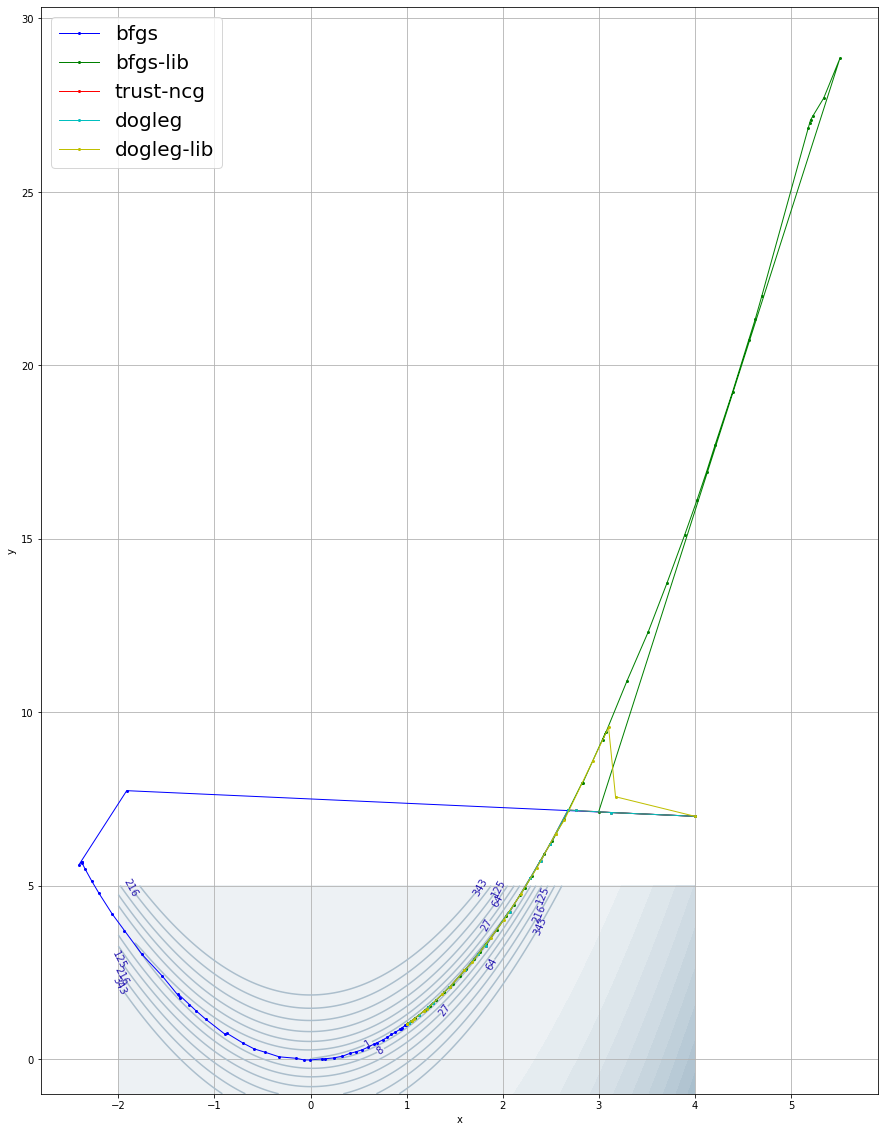

Стартовая точка: [3. 5.]
bfgs                          	 Ответ : [1.00000001 1.00000001]. Количество операций : 46. Время : 24 миллисекунд. Память : 8.763 KB
bfgs-lib                      	 Ответ : [1.00000001 1.00000001]. Количество операций : 23. Время : 8 миллисекунд. Память : 8.078 KB
gauss-newton 1.0 1.0 4
trust-ncg                     	 Ответ : [1.00000001 1.00000001]. Количество операций : 29. Время : 18 миллисекунд. Память : 9.079 KB
dogleg                        	 Ответ : [1. 1.]. Количество операций : 22. Время : 8 миллисекунд. Память : 4.295 KB
dogleg-lib                    	 Ответ : [1. 1.]. Количество операций : 22. Время : 7 миллисекунд. Память : 7.226 KB


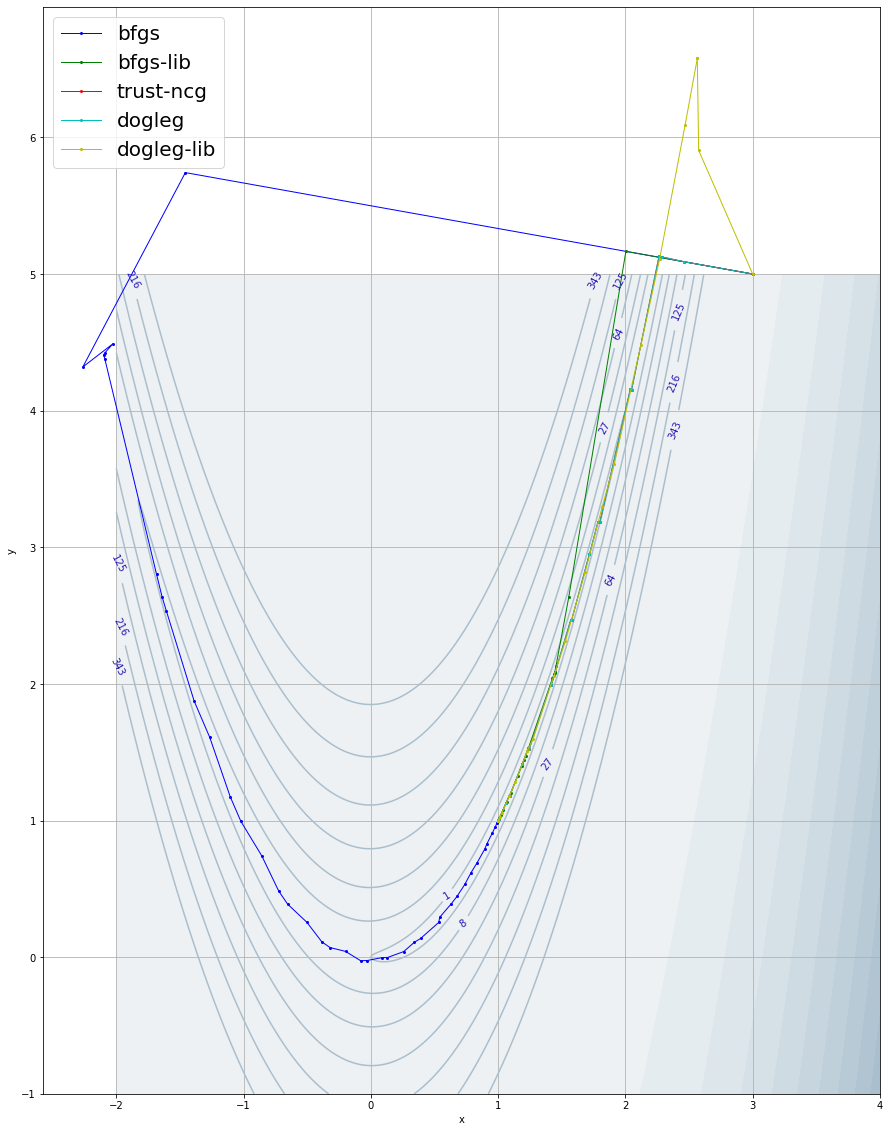

[0.99999992 0.99999991]
[3. 2.]
[3. 3.]


In [3]:
import scipy as sp
from scipy.optimize import minimize, least_squares
from numpy import linalg


def bfgs_method(f, grad, x0, steps=1000, eps=1e-6):
    grad_k = grad(x0)
    I = np.eye(len(x0), dtype=int)
    Hk = I
    xk = x0
    points = []
    for i in range(steps):
        points.append(xk)
        if LA.norm(grad_k) <= eps:
            return xk, i + 1, np.asarray(points)
        pk = -np.dot(Hk, grad_k) # direction of search
        try:
            sk = sp.optimize.line_search(f, grad, xk, pk)[0] * pk # coefficient satisfies the Wolfe conditions
        except TypeError:
            return None, i + 1, np.asarray(points)
        xk = xk + sk

        grad_cur = grad(xk)
        yk = grad_cur - grad_k
        grad_k = grad_cur

        coef = 1.0 / np.dot(yk, sk)
        Hk = np.dot(
            I - coef * sk[:, np.newaxis] * yk[np.newaxis, :],
            np.dot(Hk, I - coef * yk[:, np.newaxis] * sk[np.newaxis, :])) \
             + (coef * sk[:, np.newaxis] * sk[np.newaxis, :]) # next hessian
    return None, None, np.asarray(points)

# Dogleg

def dogleg_method(Hk, gk, Bk, trust_radius):
    pB = -np.dot(Hk, gk)
    norm_pB = sqrt(np.dot(pB, pB))

    if norm_pB <= trust_radius:
        return pB

    pU = - (np.dot(gk, gk) / np.dot(gk, np.dot(Bk, gk))) * gk
    dot_pU = np.dot(pU, pU)
    norm_pU = sqrt(dot_pU)

    if norm_pU >= trust_radius:
        return trust_radius * pU / norm_pU

    pB_pU = pB - pU
    dot_pB_pU = np.dot(pB_pU, pB_pU)
    dot_pU_pB_pU = np.dot(pU, pB_pU)
    fact = dot_pU_pB_pU ** 2 - dot_pB_pU * (dot_pU - trust_radius ** 2)
    tau = (-dot_pU_pB_pU + sqrt(fact)) / dot_pB_pU

    return pU + tau * pB_pU

def trust_region_dogleg(func, jac, hess, x0, initial_trust_radius=1.0,
                        max_trust_radius=100.0, eta=0.15, gtol=1e-4,
                        maxiter=100):
    tr = []
    xk = x0
    trust_radius = initial_trust_radius
    k = 0
    while True:
        tr.append(xk)
        gk = jac(xk)
        Bk = hess(xk)
        Hk = np.linalg.inv(Bk)

        pk = dogleg_method(Hk, gk, Bk, trust_radius)

        act_red = func(np.array(xk)) - func(np.array(xk + pk))

        pred_red = -(np.dot(gk, pk) + 0.5 * np.dot(pk, np.dot(Bk, pk)))

        rhok = act_red / pred_red
        if pred_red == 0.0:
            rhok = 1e99
        else:
            rhok = act_red / pred_red

        norm_pk = sqrt(np.dot(pk, pk))

        if rhok < 0.25:
            trust_radius = 0.25 * norm_pk
        else:
            if rhok > 0.75 and norm_pk == trust_radius:
                trust_radius = min(2.0 * trust_radius, max_trust_radius)
            else:
                trust_radius = trust_radius

        if rhok > eta:
            xk = xk + pk
        else:
            xk = xk

        if linalg.norm(gk) < gtol:
            break

        if k >= maxiter:
            break
        k = k + 1
    return xk, k - 1, np.asarray(tr)

step_representation = ["bfgs", "bfgs-lib", "trust-ncg", "dogleg", "dogleg-lib"]

def plot_all_graph(f, trace, step_representation):
    fig, ax = plt.subplots()

    x, y = np.mgrid[-2:4:1000j, -1:5:1000j]
    z = f(x, y)

    levels = [x ** 3 for x in range(8)]
    r = np.linspace(240, 166, 256) / 255.
    g = np.linspace(244, 188, 256) / 255.
    b = np.linspace(246, 203, 256) / 255.
    cmap = ListedColormap(np.vstack((r, g, b)).T)

    ax.contourf(x, y, z, levels=10, cmap=cmap)
    cs = ax.contour(x, y, z, levels=levels, colors="#ABBECC")
    ax.clabel(cs, colors="#2618B1")
    color = ["b", "g", "r", "c", "y", "m"]
    for i in range(len(trace)):
        t = np.array(trace[i])
        ax.plot(t[:, 0], t[:, 1], '-o' + color[i], linewidth=1., ms=2, label=step_representation[i])
    #   b g r c m y
    ax.legend(prop={'size': 20})
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid()

    fig.set_figwidth(15)
    fig.set_figheight(20)

    plt.show()

fs_simple = [lambda x: 5 * (x[1] - x[0]) ** 2 + (1 - x[0]) ** 2,
             lambda x: 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2,
             ]

fs_simple2 = [lambda x: np.array([sqrt(5) * (x[1] - x[0]), (1 - x[0])]),
              lambda x: np.array([10 * (x[1] - x[0] ** 2), (1 - x[0])]),
             ]

fs_simple3 = [lambda x, y: 5 * (y - x) ** 2 + (1 - x) ** 2,
             lambda x, y: 100 * (y - x ** 2) ** 2 + (1 - x) ** 2,
             ]

derivatives_simple = [lambda x: np.array([-10 * (x[1] - x[0]) + 2 * x[0] - 2, 10 * (x[1] - x[0])]),
                      lambda x: np.array([2 * (-1 + x[0] + 200 * x[0] ** 3 - 200 * x[0] * x[1]), 200 * (-x[0] ** 2 + x[1])]),
                      ]

hessians = [lambda x: np.array([[12, -10], [-10, 10]]),
            lambda x: np.array([[1200 * x[0]**2 - 400 * x[1]+2, -400 * x[0]], [-400 * x[0], 200]]),
            ]

representations = ["5 * (y - x) ^ 2 + (1 - x) ^ 2",
                   "(100 * (y - x ^ 2) ^ 2 + (1 - x) ^ 2)"]


starts = np.array([[0., 0.], [-1.2, 0.], [2.5, 3.], [4., 7.], [3., 5.]])

for i, f in enumerate(fs_simple2):
    print(f'f = {representations[i]}:')
    for s in starts:
        print("Стартовая точка:", s)
        tr = []
        tracemalloc.start()
        start = datetime.datetime.now()
        result, k, r = bfgs_method(fs_simple[i], derivatives_simple[i], s)
        if result is None:
            print("failure ", r[-1])
            ans = "..."
        else:
            ans = result
        end = datetime.datetime.now()
        _, memory = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        time = (end - start) / 1000
        memory /= 1000
        tr.append(r)
        print(f'{"bfgs".ljust(30, " ")}\t Ответ : {ans}. Количество операций : {k}. Время : {time.microseconds} миллисекунд. Память : {memory} KB')


        tracemalloc.start()
        start = datetime.datetime.now()
        res = minimize(fs_simple[i], s, method='BFGS',
               jac=derivatives_simple[i],
               options={'gtol': 1e-6, 'return_all': True})
        end = datetime.datetime.now()
        _, memory = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        time = (end - start) / 1000
        memory /= 1000
        tr.append(res.allvecs)

        print(f'{"bfgs-lib".ljust(30, " ")}\t Ответ : {ans}. Количество операций : {res.nit}. Время : {time.microseconds} миллисекунд. Память : {memory} KB')


        result = least_squares(fs_simple2[i], np.array(s))
        print("gauss-newton", result.x[0], result.x[1], result.nfev)

        tracemalloc.start()
        start = datetime.datetime.now()
        res = minimize(fs_simple[i], s, method='trust-ncg',
               jac=derivatives_simple[i],
               hess=hessians[i],
               options={'return_all': True})
        end = datetime.datetime.now()
        _, memory = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        time = (end - start) / 1000
        memory /= 1000
        tr.append(res.allvecs)
        print(f'{"trust-ncg".ljust(30, " ")}\t Ответ : {ans}. Количество операций : {res.nit}. Время : {time.microseconds} миллисекунд. Память : {memory} KB')

        tracemalloc.start()
        start = datetime.datetime.now()
        ans, k, r = trust_region_dogleg(fs_simple[i], derivatives_simple[i], hessians[i], s)
        end = datetime.datetime.now()
        _, memory = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        time = (end - start) / 1000
        memory /= 1000
        tr.append(res.allvecs)
        print(f'{"dogleg".ljust(30, " ")}\t Ответ : {ans}. Количество операций : {k}. Время : {time.microseconds} миллисекунд. Память : {memory} KB')

        tracemalloc.start()
        start = datetime.datetime.now()
        res = minimize(fs_simple[i], s, method='dogleg',
               jac=derivatives_simple[i], hess=hessians[i],
               options={'return_all': True})
        end = datetime.datetime.now()
        _, memory = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        time = (end - start) / 1000
        memory /= 1000
        tr.append(res.allvecs)
        print(f'{"dogleg-lib".ljust(30, " ")}\t Ответ : {ans}. Количество операций : {res.nit}. Время : {time.microseconds} миллисекунд. Память : {memory} KB')
        plot_all_graph(fs_simple3[i], tr, step_representation)


print(minimize(fs_simple[0], np.array([3.5, 4])).x)
print(minimize(fs_simple[0], np.array([3.5, 4]), bounds=[[3, 4], [0, 2]]).x)
print(minimize(fs_simple[0], np.array([3.5, 4]), bounds=[[3, 4], (None, None)]).x)

In [4]:
def func(arr):
    return (arr[0] - 3) ** 2 + (arr[1] - 5) ** 2

scipy.optimize.minimize(func, np.array([0, 0]), options={"disp": True})

linconstr = scipy.optimize.LinearConstraint([[1, 1]], [-1], [5])
scipy.optimize.minimize(func, np.array([0, 0]), constraints=[linconstr],
                        options={"disp": True})


def constr1(x):
    return x[0] ** 2 + x[1] ** 2 - 16

nonlinconstr = scipy.optimize.NonlinearConstraint(constr1, [-np.inf], [0])
scipy.optimize.minimize(func, np.array([0, 0]), constraints=[nonlinconstr],
                        options={"disp": True})

nonlinconstr2 = scipy.optimize.NonlinearConstraint(constr1, [0], [0])
linconstr2 = scipy.optimize.LinearConstraint([[0, 1]], [-3.5], [3.5])
scipy.optimize.minimize(func, np.array([0, -4]), constraints=[nonlinconstr2, linconstr2],
                        options={"disp": True})


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 12
         Gradient evaluations: 4
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.500000000000039
            Iterations: 4
            Function evaluations: 12
            Gradient evaluations: 4
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.3523848411760606
            Iterations: 6
            Function evaluations: 19
            Gradient evaluations: 6
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.352384841115411
            Iterations: 29
            Function evaluations: 142
            Gradient evaluations: 29


     fun: 3.352384841115411
     jac: array([-1.88403395, -3.14005655])
 message: 'Optimization terminated successfully'
    nfev: 142
     nit: 29
    njev: 29
  status: 0
 success: True
       x: array([2.05798301, 3.42997171])